In [14]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

In [15]:
import matplotlib
matplotlib.style.use('publication23')

In [16]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [17]:
mQ = 0.6

In [18]:
pt1 = QuarkTM.Particle(mQ, qrange, erange)

In [19]:
T = 0.2

## Compare subtracted calculation of the real part

In [20]:
T = 0.2

In [21]:
# %%timeit
rr1 = array([tm.ReG2_subtr(e, 0, T, pt1.R, pt1.R, 5) for e in erange])

In [22]:
# %%timeit
rr2 = array([tm.ReG2_pole(e, 0, T, pt1.R, pt1.R, 5) for e in erange])

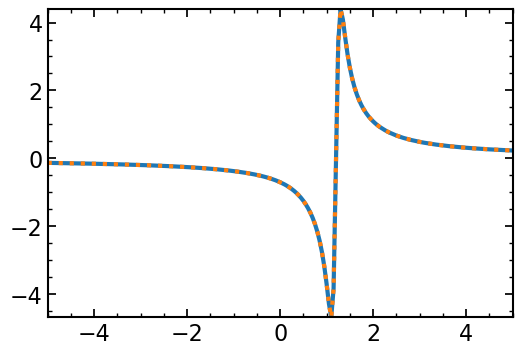

In [23]:
plt.plot(erange, rr1)
plt.plot(erange, -rr2, ls=':')

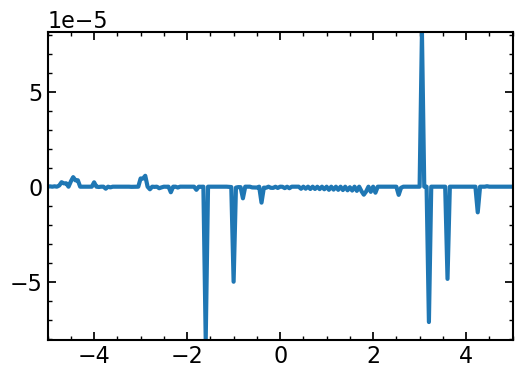

In [24]:
plt.plot(erange, rr1 +  rr2)

## Compare channels built with different methods

In [7]:
ch_KK = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=0)

In [8]:
ch_KK_exp = QuarkTM.Channel(pt1, pt1, T, G2_mode=0, expand=1)

In [9]:
ch_full = QuarkTM.Channel(pt1, pt1, T, G2_mode=1, expand=0)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [03:33<00:00,  4.19s/it]


In [10]:
ch_full_exp = QuarkTM.Channel(pt1, pt1, T, G2_mode=1, expand=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [06:51<00:00,  4.07s/it]


In [11]:
ch_KK.populate_T_fast()
ch_KK_exp.populate_T_fast()
ch_full.populate_T_fast()
ch_full_exp.populate_T_fast()

(-500.0, 0.0)

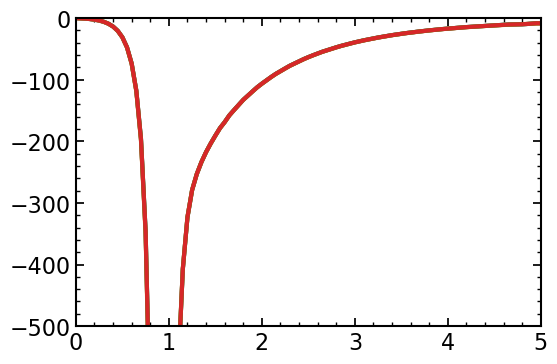

In [12]:
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))
plt.plot(ch_KK_exp.erange, imag(ch_KK_exp.TM[:, 0]))
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))
plt.plot(ch_KK.erange, imag(ch_KK.TM[:, 0]))

plt.xlim(0, 5)

plt.ylim(-500, 0)

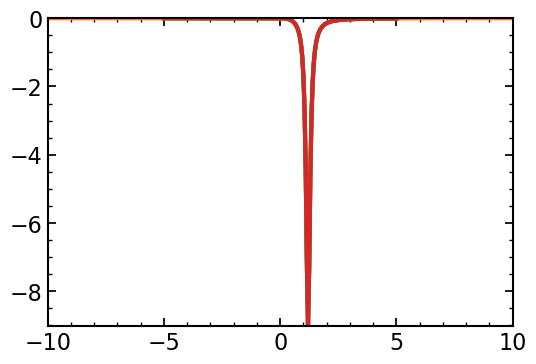

In [13]:
plt.plot(ch_KK.erange, imag(ch_KK.G2[:, 0]))
plt.plot(ch_KK_exp.erange, imag(ch_KK_exp.G2[:, 0]))
plt.plot(ch_KK.erange, imag(ch_full.G2[:, 0]))
plt.plot(ch_KK.erange, imag(ch_full.G2[:, 0]))

In [14]:
e = 2.5
i_kk = np.argmin(abs(ch_KK.erange - e))
i_kk_exp = np.argmin(abs(ch_KK_exp.erange - e))
i_full = np.argmin(abs(ch_full.erange - e))
i_full_exp = np.argmin(abs(ch_full_exp.erange - e))

(0.0, 6.0)

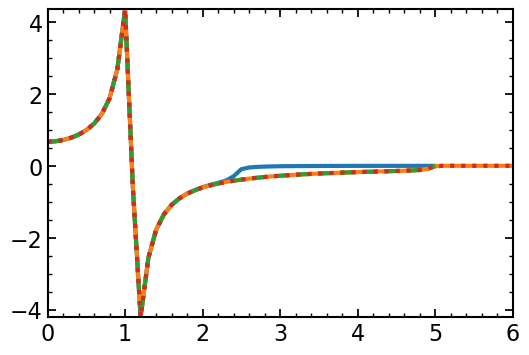

In [15]:
plt.plot(ch_KK.qrange, real(ch_KK.G2[i_kk, :]))
plt.plot(ch_KK_exp.qrange, real(ch_KK_exp.G2[i_kk_exp, :]))
plt.plot(ch_full.qrange, real(ch_full.G2[i_full, :]), ls='--')
plt.plot(ch_full_exp.qrange, real(ch_full_exp.G2[i_full_exp, :]), ls=':')
plt.xlim(0, 6)

(0.0, 6.0)

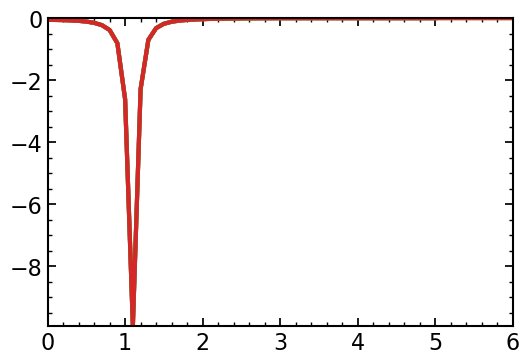

In [16]:
plt.plot(ch_KK.qrange, imag(ch_KK.G2[i_kk, :]))
plt.plot(ch_KK_exp.qrange, imag(ch_KK_exp.G2[i_kk_exp, :]))
plt.plot(ch_full.qrange, imag(ch_full.G2[i_full, :]))
plt.plot(ch_full_exp.qrange, imag(ch_full_exp.G2[i_full_exp, :]))
plt.xlim(0, 6)